## ANN Model 

### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Specialization - Machine Learning\Achievement 1\Data Sets'

In [3]:
# Importing Climate Wins Original Dataset
climate =  pd.read_csv(os.path.join(path, 'Climate_Wins_Original.csv'))

In [4]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [7]:
# Importing Answers Dataset
answers =  pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Preparation

In [9]:
columns = climate.columns.tolist()

In [10]:
len(columns)

170

In [11]:
to_drop = ['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
              'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
            'TOURS_temp_max']

In [13]:
for col in to_drop:
    columns.remove(col)
len(columns)

149

In [14]:
climate_2 = climate[columns]

In [15]:
climate_2.shape

(22950, 149)

In [16]:
climate_2.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


### Split and Scale Data

In [17]:
# Splitting

In [18]:
X = climate_2.drop(columns=['DATE', 'MONTH'])
y = answers.drop(columns=['DATE'])

In [19]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [20]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [22]:
# Scaling

In [23]:
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc)

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 0.25088236 -0.03095027  0.55778807 ... -0.34360725 -0.03505826
  -0.58295658]
 [ 0.66637232 -0.03095027 -0.52626537 ...  0.10598209  0.1560625
   0.0474975 ]
 [ 0.25088236 -0.44865764 -0.70694094 ... -0.34360725 -0.49920869
  -0.15310152]]


In [24]:
#Assign the scaled data to DFs
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [25]:
X_train_df.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,-1.411077,-0.030950,-0.616603,-0.746131,1.181615,-0.321907,-0.178396,0.530475,1.352627,1.112763,...,0.169208,0.059797,-0.566890,-0.008427,-0.146880,-0.024111,-0.411551,1.454750,1.575817,1.165121
20472,1.081862,-0.587893,0.557788,-0.214102,-0.827240,-0.262136,-0.178396,-1.069706,-1.652545,-1.455149,...,-0.443416,-0.080424,-0.007306,-1.066874,-0.003704,-0.024111,-0.023323,-0.013908,-0.007755,-0.009817
18269,0.666372,-0.866365,0.738464,-1.262958,-1.009863,-0.301983,0.821457,-0.930560,-1.652545,-1.883135,...,-0.443416,1.041345,0.403055,-0.831663,-0.422219,-0.024111,-0.083050,-2.921253,-3.229505,-2.187749
7713,-1.411077,-0.030950,-0.164914,0.409131,-0.590904,-0.441448,-0.178396,-0.258020,-1.598397,-1.546860,...,1.394457,1.181566,-1.033209,-1.113916,1.284882,-0.024111,-1.038689,-1.182841,-0.663026,-1.127440
21958,0.666372,3.171473,-0.616603,-0.685328,-0.827240,1.909538,-0.178396,-0.953751,-0.583137,-0.690890,...,-0.443416,-0.080424,-0.007306,-0.008427,-0.003704,-0.024111,-0.023323,-0.013908,-0.007755,-0.009817


## ANN Model Scenarios

### Scenario 1 -  hidden layer (5, 5), max_iter=500, tol=0.0001

In [26]:
# Creating the ANN
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fitting the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [27]:
y_pred = mlp.predict(X_train_df)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print(accuracy_score(y_pred_test, y_test))

0.485475249825703
0.49355176019519


### Confusion Matrix - Scenario 1

In [29]:
locations = list({x.split("_")[0] for x in climate_2.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


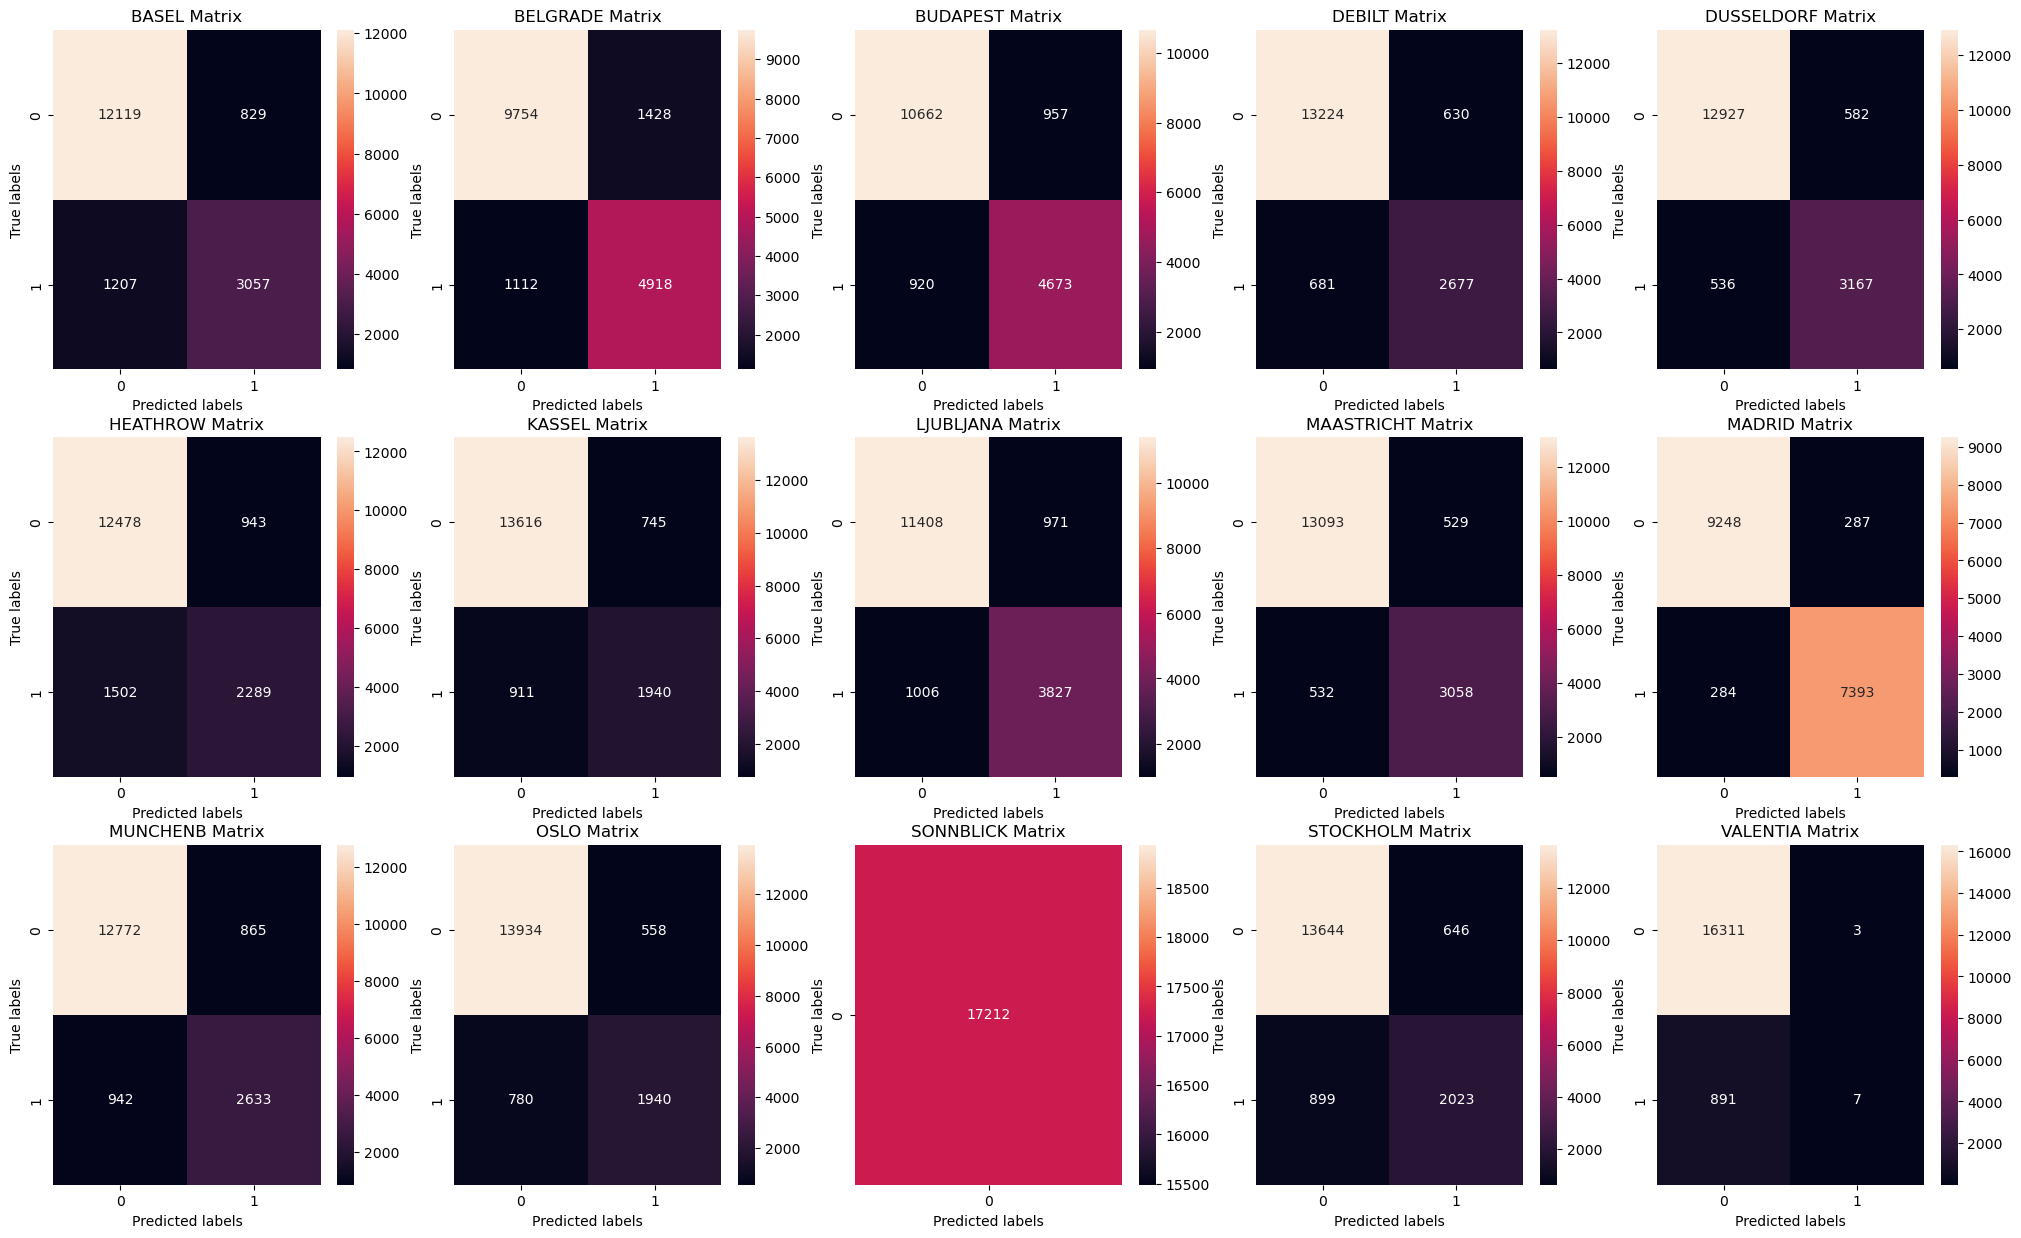

In [30]:
#Confusion matrix for training data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [31]:
key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_train.loc[:, name + key],
        y_pred[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

# Convert to DataFrame
cm_table_train = pd.DataFrame(metrics_list)
cm_table_train

,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,12119,3057,829,1207,0.88
1,BELGRADE,9754,4918,1428,1112,0.85
2,BUDAPEST,10662,4673,957,920,0.89
3,DEBILT,13224,2677,630,681,0.92
4,DUSSELDORF,12927,3167,582,536,0.94
5,HEATHROW,12478,2289,943,1502,0.86
6,KASSEL,13616,1940,745,911,0.90
7,LJUBLJANA,11408,3827,971,1006,0.89
8,MAASTRICHT,13093,3058,529,532,0.94
9,MADRID,9248,7393,287,284,0.97


C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


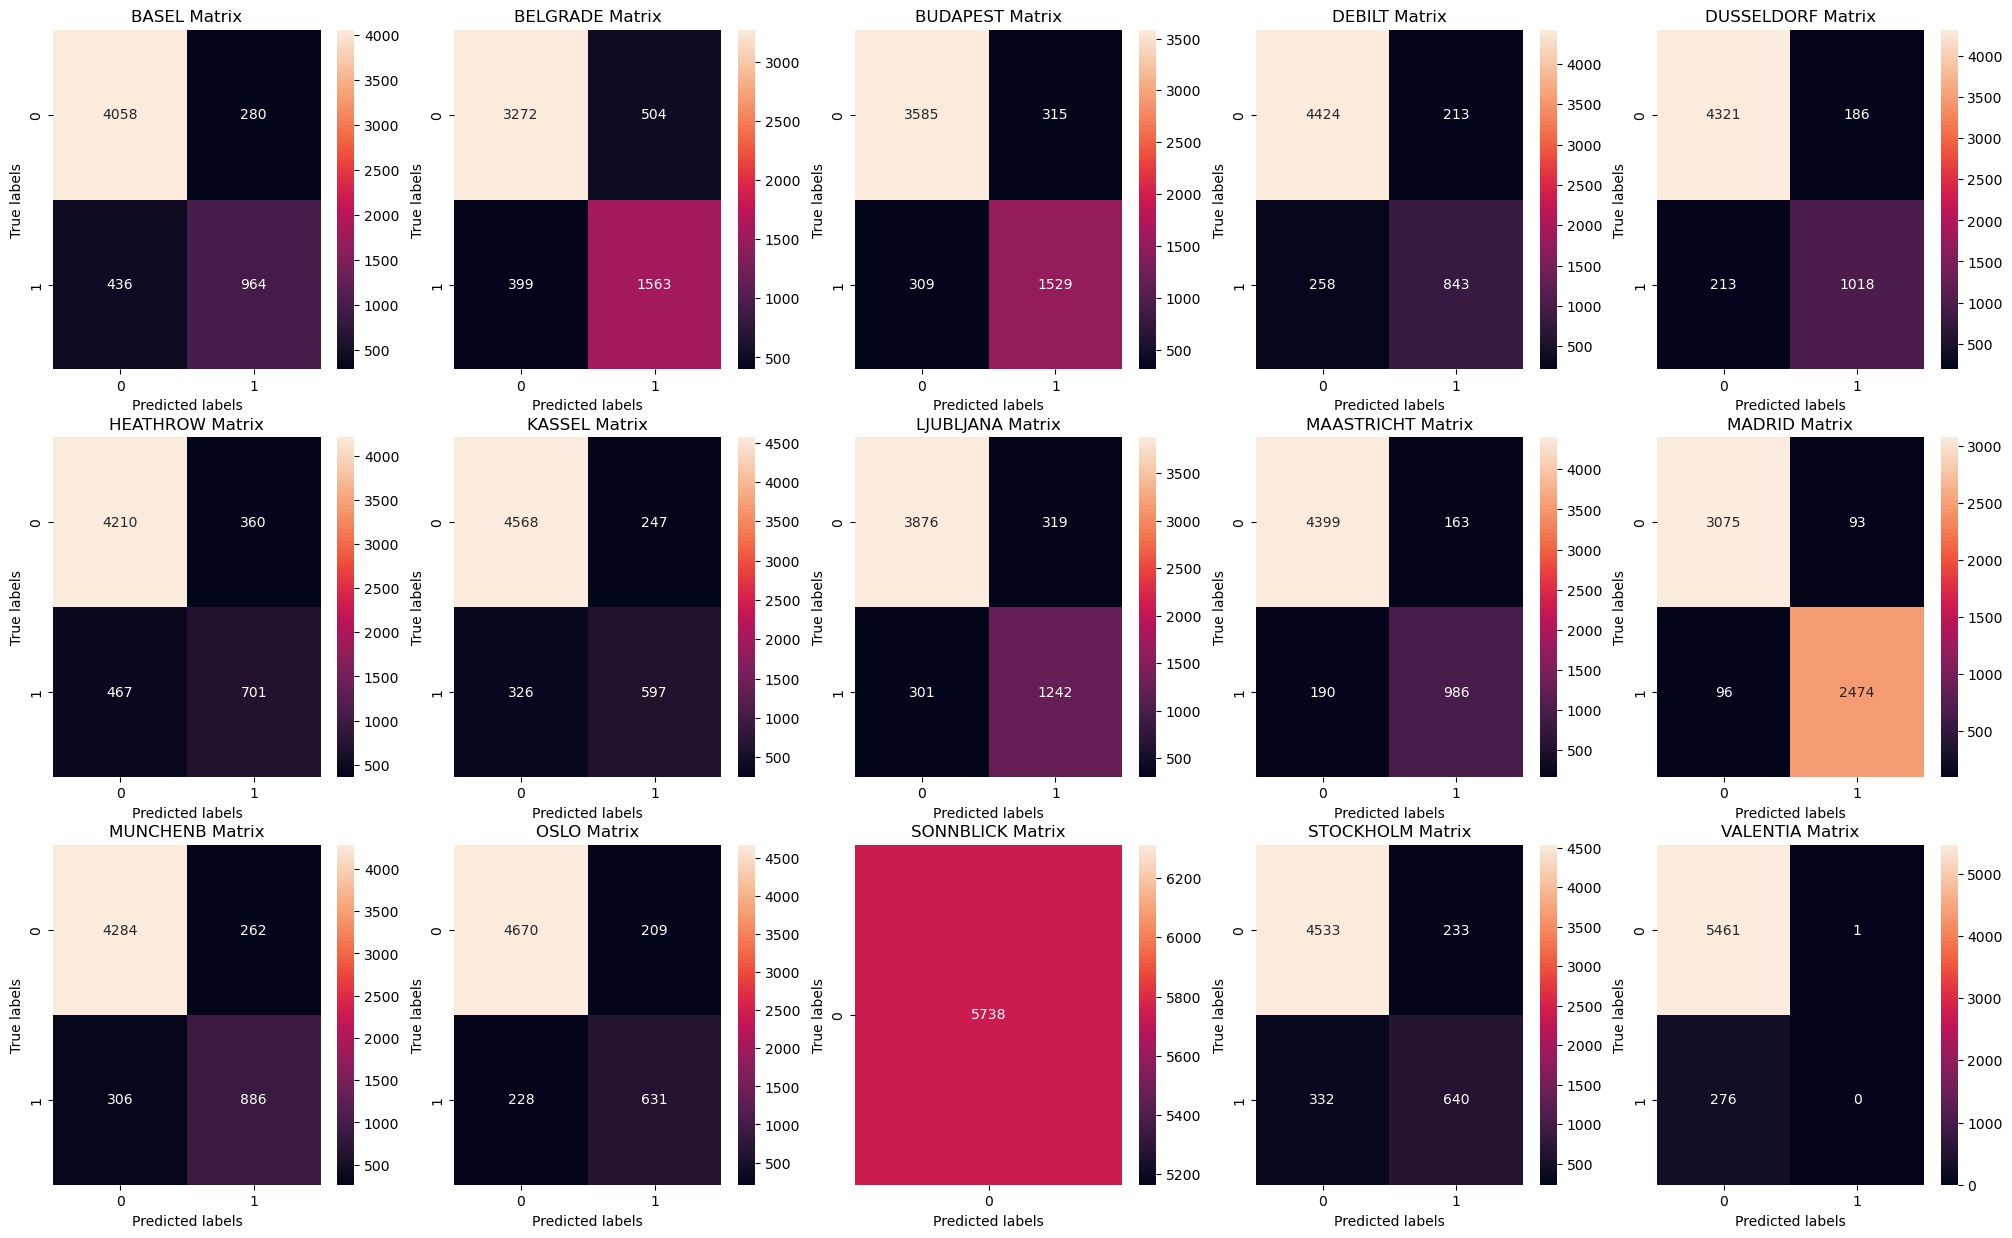

In [32]:
#Confusion matrix for testing data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [33]:
key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_test.loc[:, name + key],
        y_pred_test[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

# Convert to DataFrame
cm_table_test = pd.DataFrame(metrics_list)
cm_table_test

,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,4058,964,280,436,0.88
1,BELGRADE,3272,1563,504,399,0.84
2,BUDAPEST,3585,1529,315,309,0.89
3,DEBILT,4424,843,213,258,0.92
4,DUSSELDORF,4321,1018,186,213,0.93
5,HEATHROW,4210,701,360,467,0.86
6,KASSEL,4568,597,247,326,0.90
7,LJUBLJANA,3876,1242,319,301,0.89
8,MAASTRICHT,4399,986,163,190,0.94
9,MADRID,3075,2474,93,96,0.97


### Scenario 2 - hidden layer (20, 10, 5), max_iter=1000, tol=0.0001

In [34]:
# Creating the ANN
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1000, tol=0.0001)
#Fitting the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1000)

In [35]:
y_pred = mlp.predict(X_train_df)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print(accuracy_score(y_pred_test, y_test))

0.5561236346734836
0.5390379923318229


### Confusion Matrix - Scenario 2 

C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


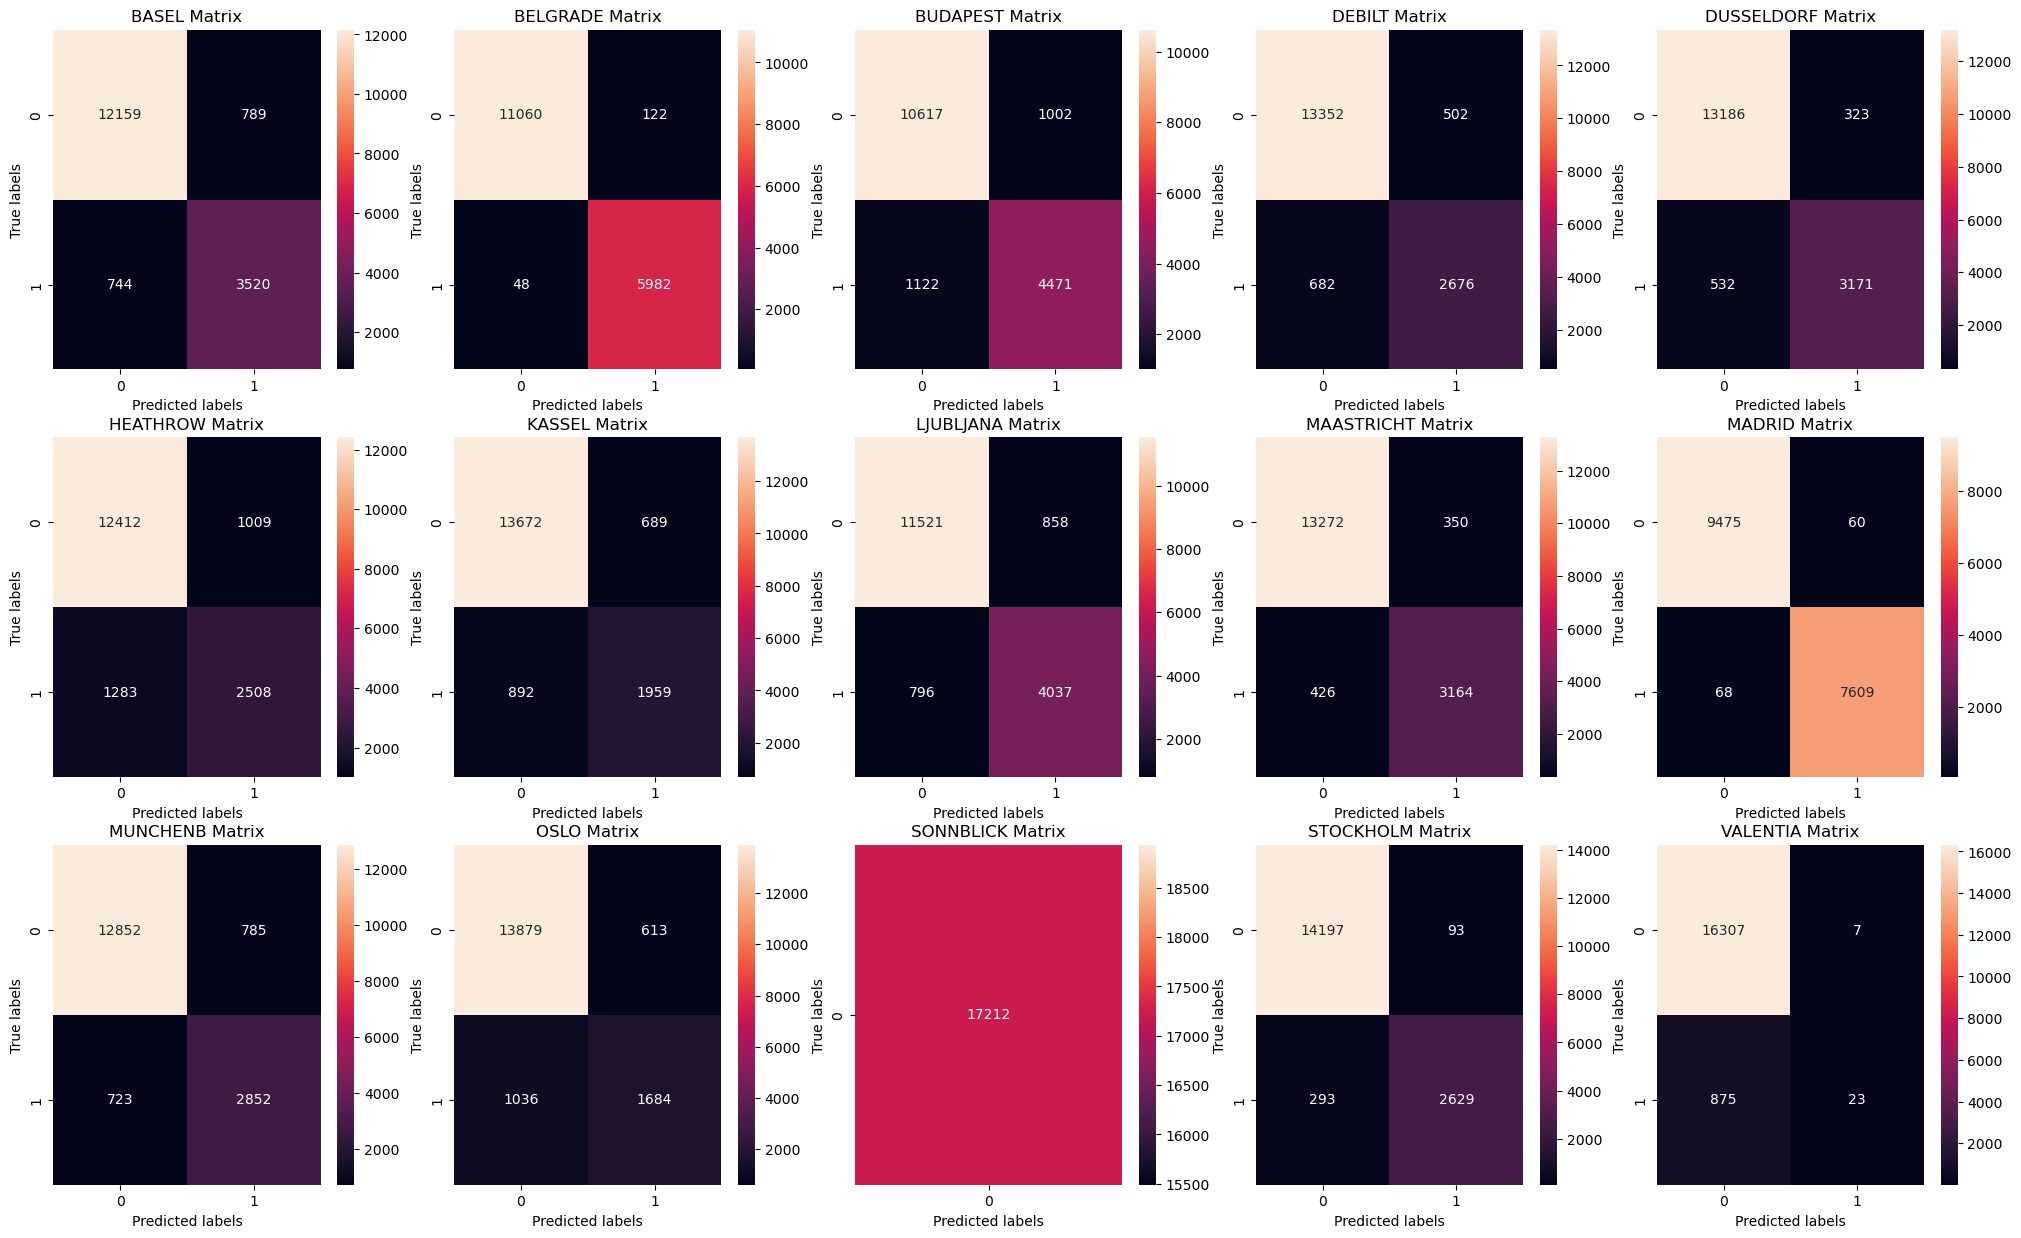

In [36]:
#Confusion matrix for training data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd

key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_train.loc[:, name + key],
        y_pred[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

# Convert to DataFrame
cm_table_train = pd.DataFrame(metrics_list)
cm_table_train


,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,12159,3520,789,744,0.91
1,BELGRADE,11060,5982,122,48,0.99
2,BUDAPEST,10617,4471,1002,1122,0.88
3,DEBILT,13352,2676,502,682,0.93
4,DUSSELDORF,13186,3171,323,532,0.95
5,HEATHROW,12412,2508,1009,1283,0.87
6,KASSEL,13672,1959,689,892,0.91
7,LJUBLJANA,11521,4037,858,796,0.90
8,MAASTRICHT,13272,3164,350,426,0.95
9,MADRID,9475,7609,60,68,0.99


C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


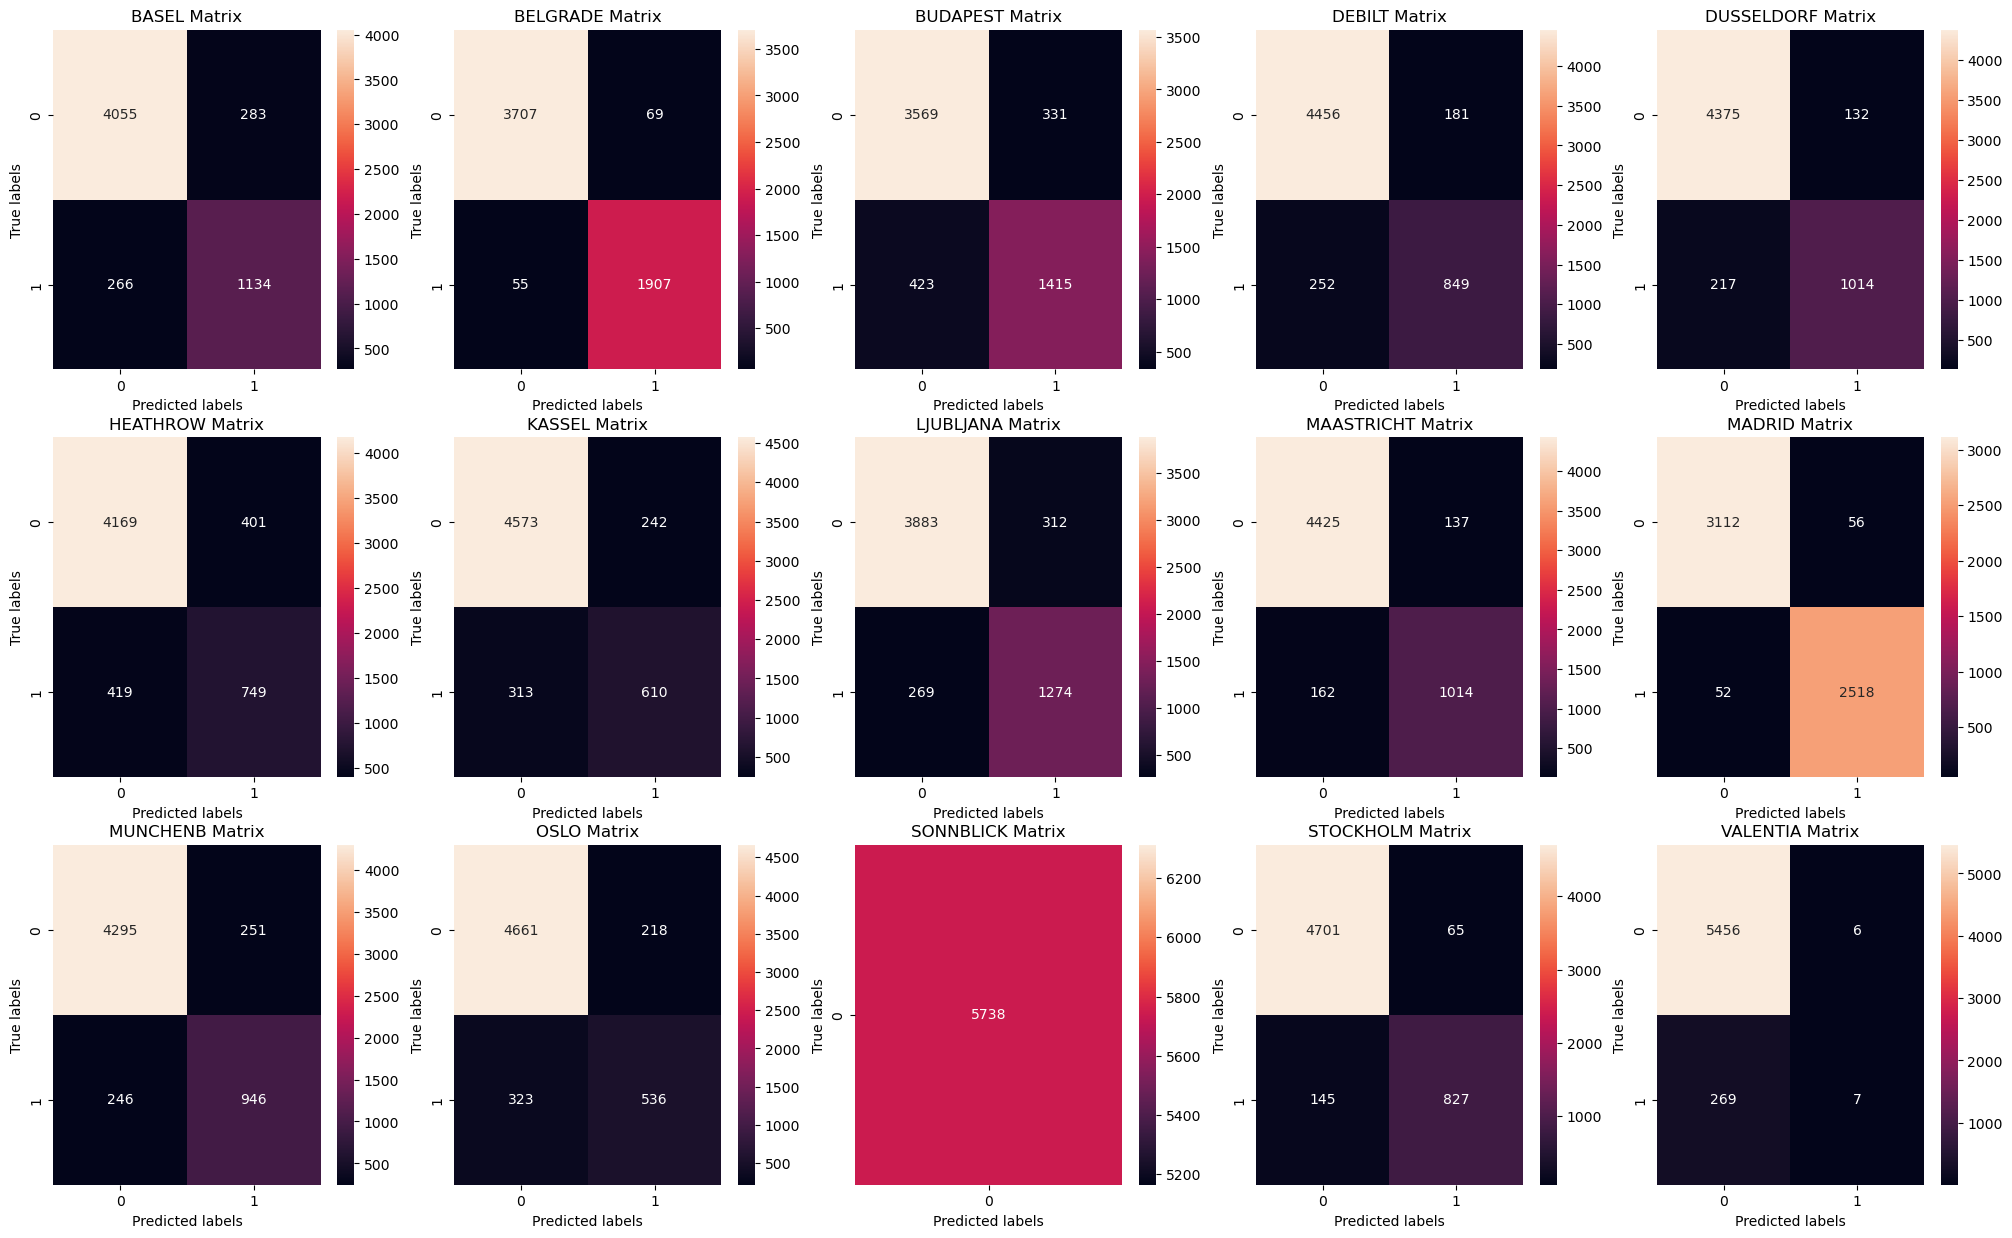

In [39]:
#Confusion matrix for testing data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [40]:
from sklearn.metrics import confusion_matrix
import pandas as pd

key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_test.loc[:, name + key],
        y_pred_test[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

# Convert to DataFrame
cm_table_test = pd.DataFrame(metrics_list)
cm_table_test


,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,4055,1134,283,266,0.90
1,BELGRADE,3707,1907,69,55,0.98
2,BUDAPEST,3569,1415,331,423,0.87
3,DEBILT,4456,849,181,252,0.92
4,DUSSELDORF,4375,1014,132,217,0.94
5,HEATHROW,4169,749,401,419,0.86
6,KASSEL,4573,610,242,313,0.90
7,LJUBLJANA,3883,1274,312,269,0.90
8,MAASTRICHT,4425,1014,137,162,0.95
9,MADRID,3112,2518,56,52,0.98


### Scenario 3 - hidden layer (50, 20, 10), max_iter=1000, tol=0.00001

In [41]:
# Creating the ANN
mlp = MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=1000, tol=0.00001)
#Fitting the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=1000, tol=1e-05)

In [42]:
y_pred = mlp.predict(X_train_df)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print(accuracy_score(y_pred_test, y_test))

0.7427376249128514
0.6500522830254444


### Confusion Matrix - Scenario 3

C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


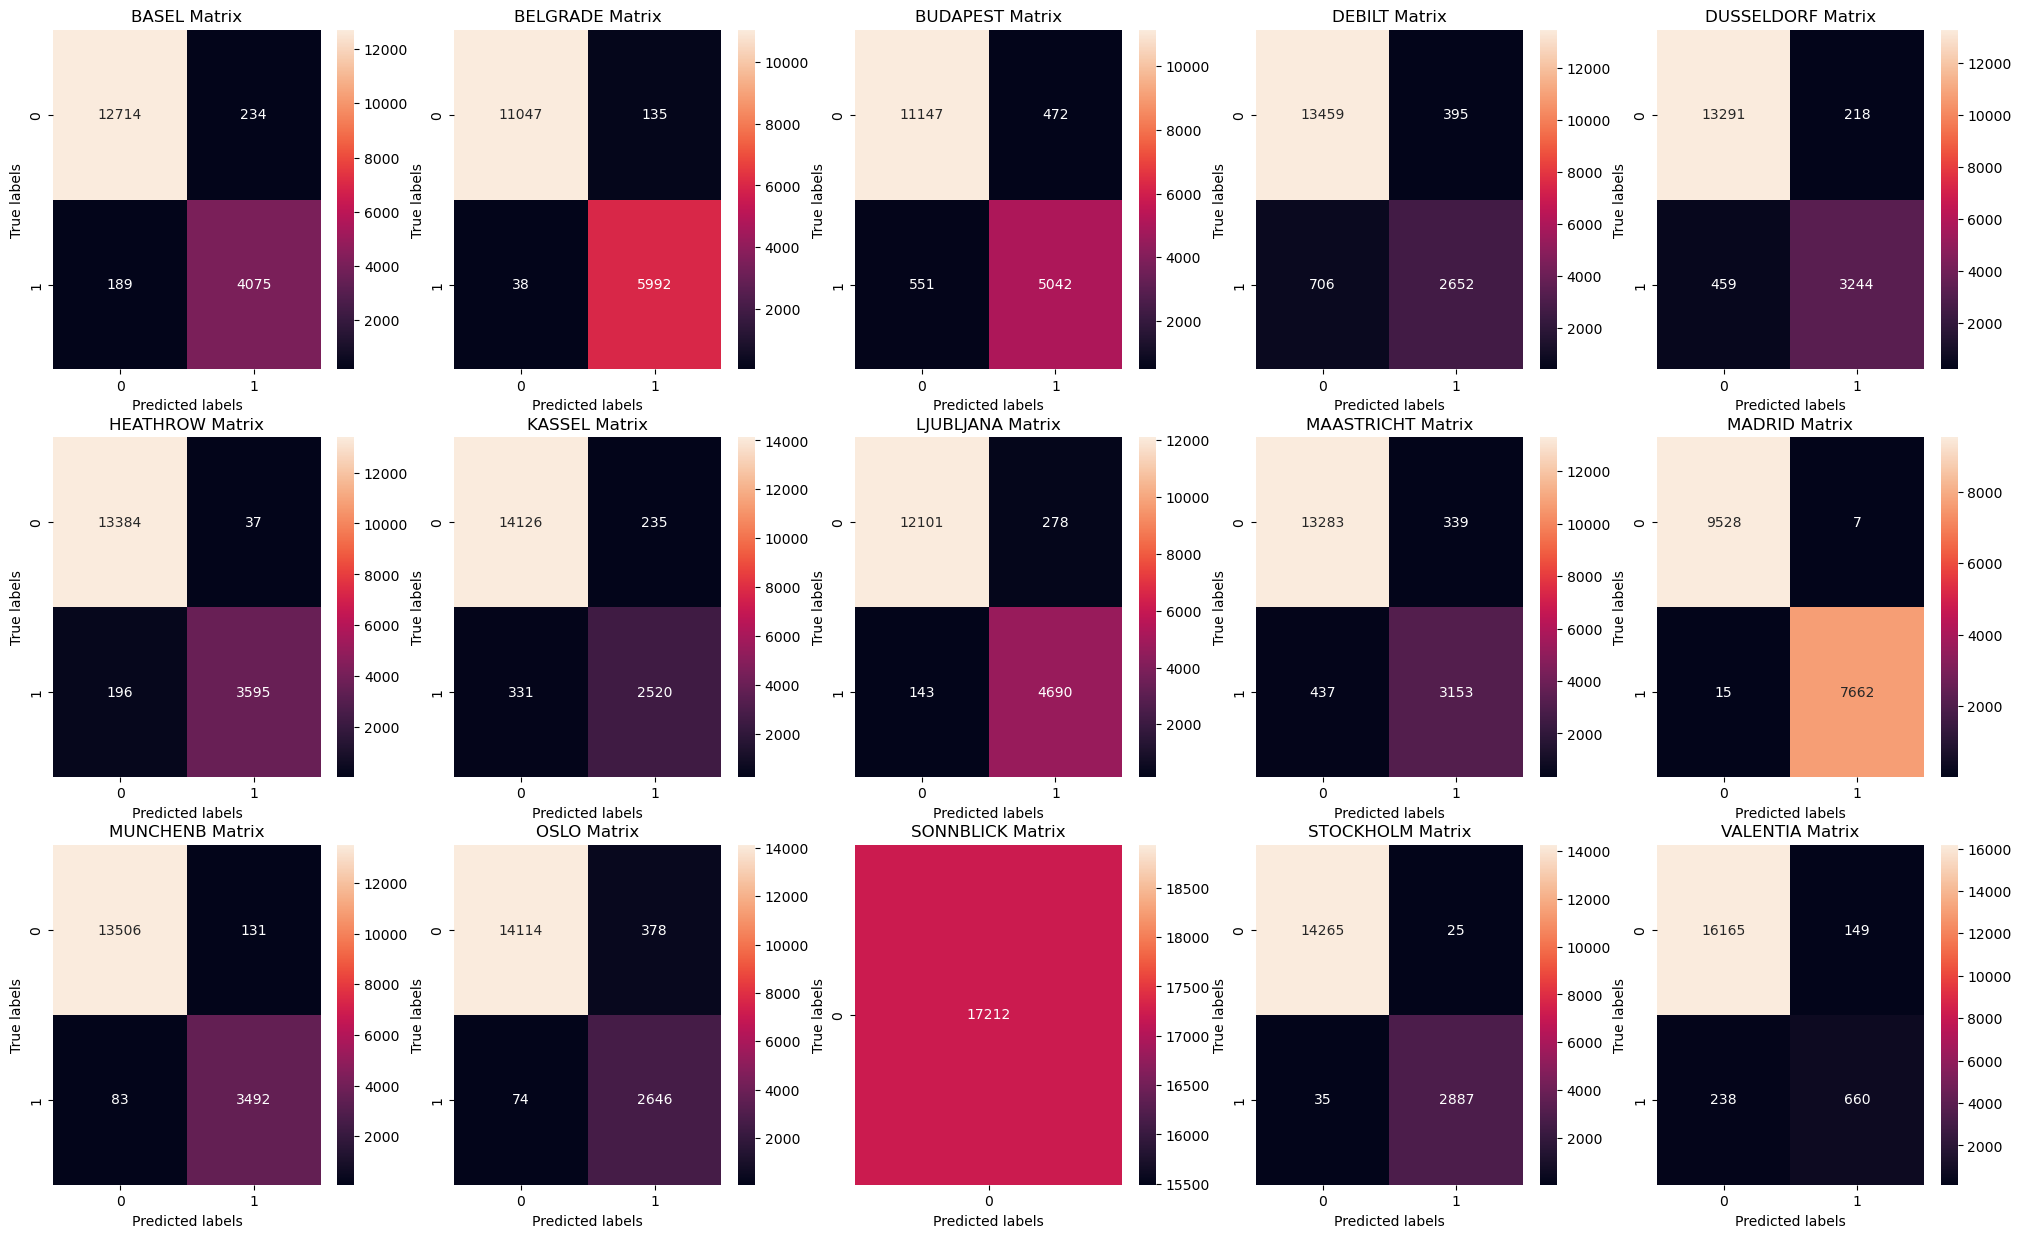

In [43]:
#Confusion matrix for training data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [46]:
key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_train.loc[:, name + key],
        y_pred[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

# Convert to DataFrame
cm_table_train = pd.DataFrame(metrics_list)
cm_table_train


,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,12714,4075,234,189,0.98
1,BELGRADE,11047,5992,135,38,0.99
2,BUDAPEST,11147,5042,472,551,0.94
3,DEBILT,13459,2652,395,706,0.94
4,DUSSELDORF,13291,3244,218,459,0.96
5,HEATHROW,13384,3595,37,196,0.99
6,KASSEL,14126,2520,235,331,0.97
7,LJUBLJANA,12101,4690,278,143,0.98
8,MAASTRICHT,13283,3153,339,437,0.95
9,MADRID,9528,7662,7,15,1.00


C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


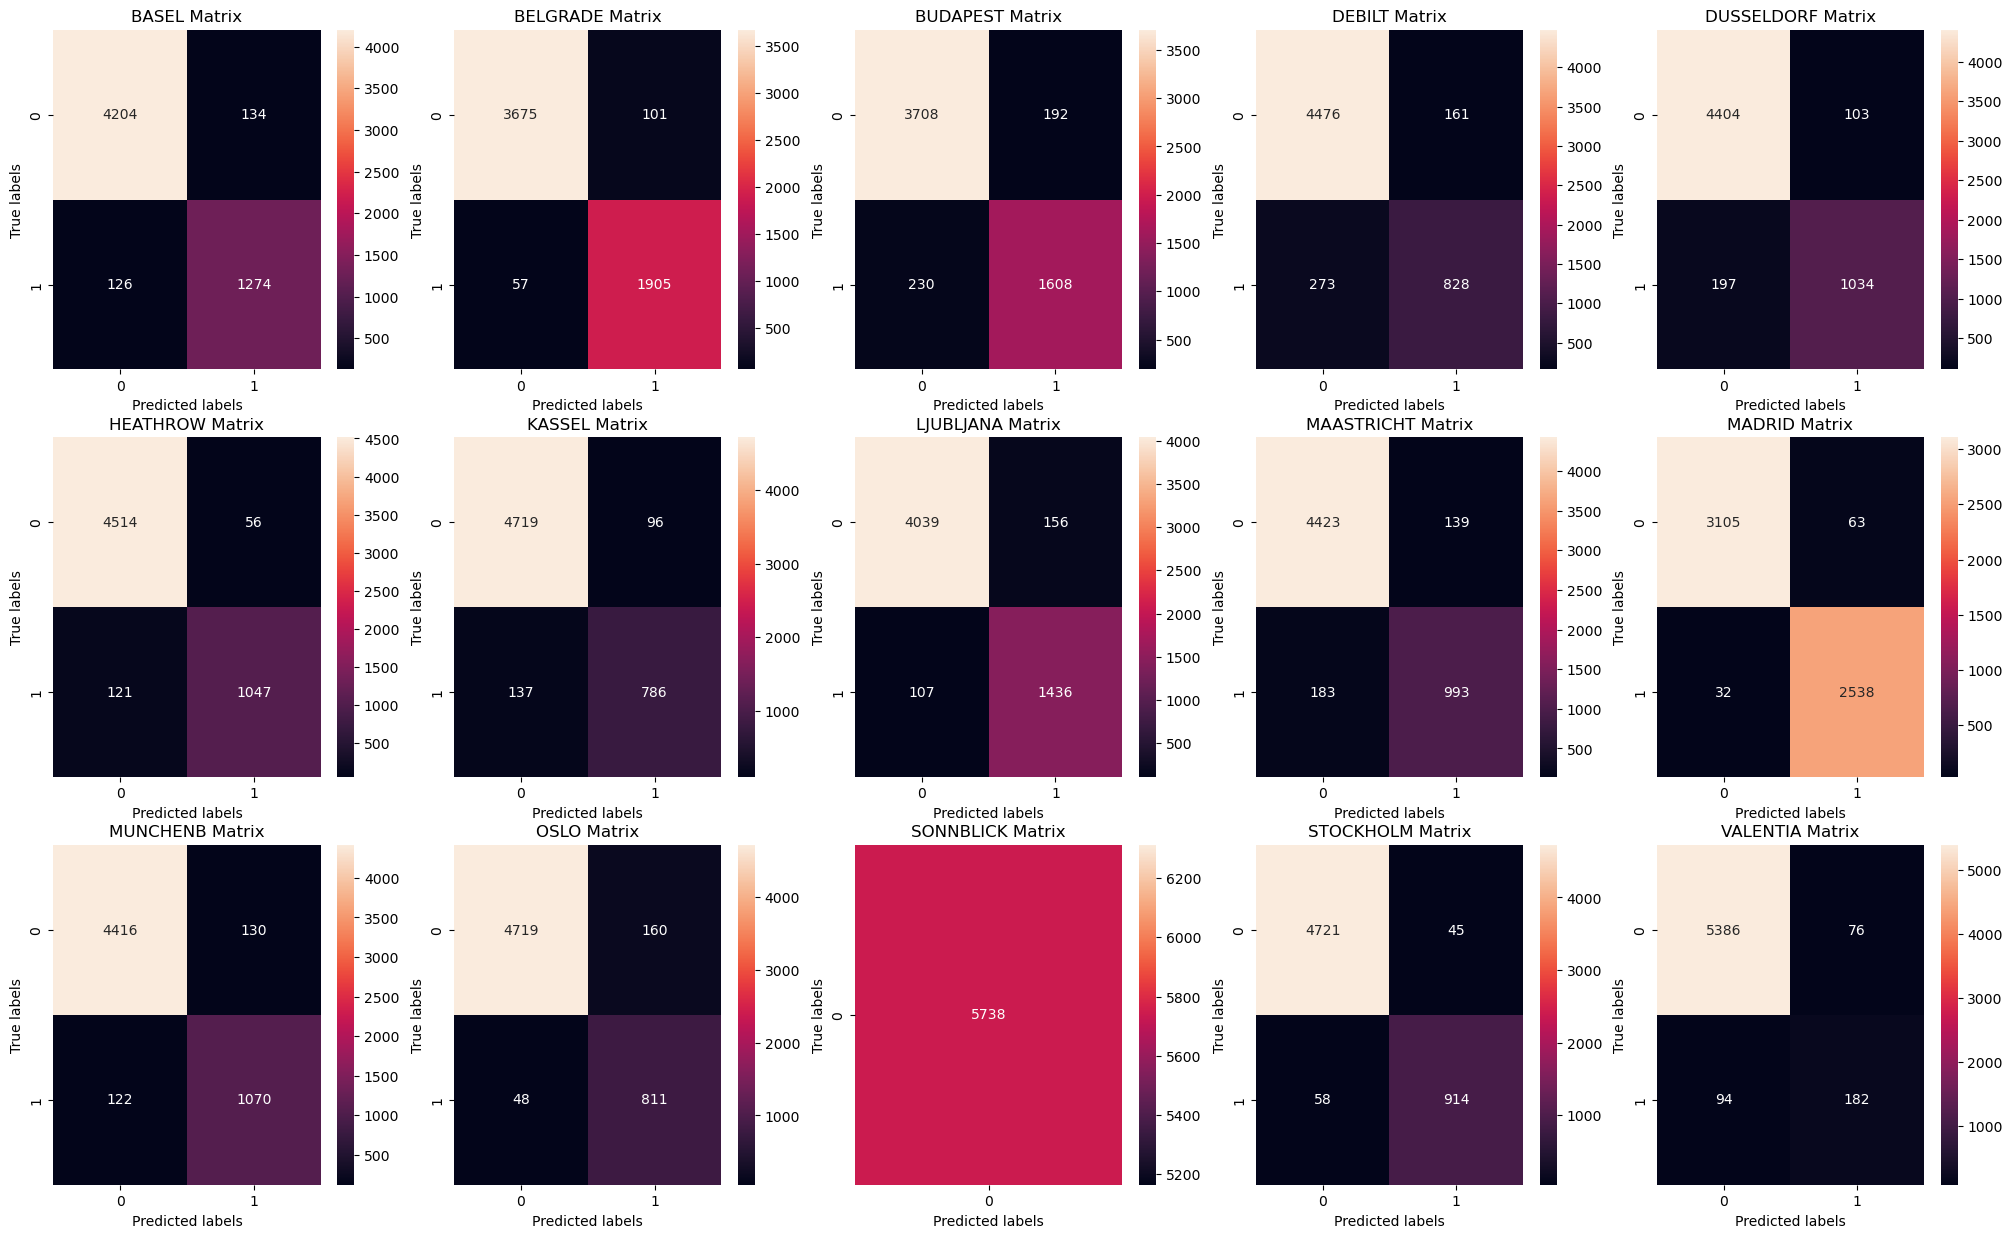

In [45]:
#Confusion matrix for testing data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [47]:
key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_test.loc[:, name + key],
        y_pred_test[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

# Convert to DataFrame
cm_table_test = pd.DataFrame(metrics_list)
cm_table_test


,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,4204,1274,134,126,0.95
1,BELGRADE,3675,1905,101,57,0.97
2,BUDAPEST,3708,1608,192,230,0.93
3,DEBILT,4476,828,161,273,0.92
4,DUSSELDORF,4404,1034,103,197,0.95
5,HEATHROW,4514,1047,56,121,0.97
6,KASSEL,4719,786,96,137,0.96
7,LJUBLJANA,4039,1436,156,107,0.95
8,MAASTRICHT,4423,993,139,183,0.94
9,MADRID,3105,2538,63,32,0.98
